In [4]:
!pip install roboflow -q

In [5]:
%pip install ultralytics -q

In [17]:
from roboflow import Roboflow
rf = Roboflow(api_key="vJ1cNa0xOQcjv4Wii35I")
project = rf.workspace("ykkk-woofa").project("sc_280_v8")
version = project.version(2)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...


RuntimeError: Version number 2 is not found.

In [15]:
# versions -> create -> download dataset 에서 code로 다운받기

from roboflow import Roboflow
rf = Roboflow(api_key="vJ1cNa0xOQcjv4Wii35I")
project = rf.workspace("ykkk-woofa").project("sc_280_v8")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.3.7, to fix: `pip install ultralytics==8.0.196`


In [ ]:
file_path = '/content/sc_280_v8-1/roboflow.zip'

with open(file_path, 'rb') as f:
    header = f.read(4)
    print(header)


b'<?xm'


In [ ]:
with open('/content/sc_280_v8-1/roboflow.zip', 'r') as f:
    content = f.read()
    print(content[:500])  # 처음 500자 출력


<?xml version='1.0' encoding='UTF-8'?><Error><Code>NoSuchKey</Code><Message>The specified key does not exist.</Message><Details>No such object: roboflow-platform-regional-exports/VbObgPGizmbhJf0fH763vU6LYsD3/E4ZmRANGRm7DiRjMLo0r/1/yolov8.zip</Details></Error>


In [ ]:
import yaml

data = {
    'train': '/content/drive/MyDrive/kdt_240424/m8_vision응용/semiconductor/data/train/images',
    'val': '/content/drive/MyDrive/kdt_240424/m8_vision응용/semiconductor/data/valid/images',
    'test': '/content/drive/MyDrive/kdt_240424/m8_vision응용/semiconductor/data/test/images',
    'names': ['Bdot','curve','dot','straight'],
    'nc': 4
}


with open('/content/drive/MyDrive/kdt_240424/m8_vision응용/semiconductor/data/data.yaml','w') as f:
    yaml.dump(data,f)


with open('/content/drive/MyDrive/kdt_240424/m8_vision응용/semiconductor/data/data.yaml','r') as f:
    data_yaml = yaml.safe_load(f)
    display(data_yaml)



{'names': ['Bdot', 'curve', 'dot', 'straight'],
 'nc': 4,
 'test': '/content/drive/MyDrive/kdt_240424/m8_vision응용/semiconductor/data/test/images',
 'train': '/content/drive/MyDrive/kdt_240424/m8_vision응용/semiconductor/data/train/images',
 'val': '/content/drive/MyDrive/kdt_240424/m8_vision응용/semiconductor/data/valid/images'}

In [ ]:
!cat /content/drive/MyDrive/kdt_240424/m8_vision응용/semiconductor/data/data.yaml

names:
- Bdot
- curve
- dot
- straight
nc: 4
test: "/content/drive/MyDrive/kdt_240424/m8_vision\u110B\u1173\u11BC\u110B\u116D\u11BC\
  /semiconductor/data/test/images"
train: "/content/drive/MyDrive/kdt_240424/m8_vision\u110B\u1173\u11BC\u110B\u116D\u11BC\
  /semiconductor/data/train/images"
val: "/content/drive/MyDrive/kdt_240424/m8_vision\u110B\u1173\u11BC\u110B\u116D\u11BC\
  /semiconductor/data/valid/images"


In [ ]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 69.7MB/s]


In [ ]:
print(type(model.names), len(model.names))

print(model.names)

<class 'dict'> 80
{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell p

In [ ]:
model.train(data='/content/drive/MyDrive/kdt_240424/m8_vision응용/semiconductor/data/data.yaml', epochs=50, patience=10, batch=32, imgsz=640)

Ultralytics 8.3.7 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/kdt_240424/m8_vision응용/semiconductor/data/data.yaml, epochs=50, time=None, patience=10, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=F

100%|██████████| 755k/755k [00:00<00:00, 14.7MB/s]


Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 66.2MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/kdt_240424/m8_vision응용/semiconductor/data/train/labels... 198 images, 9 backgrounds, 0 corrupt: 100%|██████████| 198/198 [00:43<00:00,  4.54it/s]


train: New cache created: /content/drive/MyDrive/kdt_240424/m8_vision응용/semiconductor/data/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.17 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/kdt_240424/m8_vision응용/semiconductor/data/valid/labels... 41 images, 11 backgrounds, 0 corrupt: 100%|██████████| 41/41 [00:15<00:00,  2.62it/s]

val: New cache created: /content/drive/MyDrive/kdt_240424/m8_vision응용/semiconductor/data/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 63 weight(decay=0.0), 70 weight(decay=0.0005), 69 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      4.73G      3.513      15.87      1.528         32        640: 100%|██████████| 7/7 [00:05<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.56s/it]

                   all         41        113          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      4.22G      3.299      10.67      1.417         49        640: 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.55it/s]

                   all         41        113          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      4.29G       2.99      13.02      1.149         21        640: 100%|██████████| 7/7 [00:02<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.66it/s]

                   all         41        113          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50       4.3G      2.965      8.426      1.102         17        640: 100%|██████████| 7/7 [00:03<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.05s/it]

                   all         41        113          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      4.26G      2.847      7.362      1.171         14        640: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.51it/s]

                   all         41        113   4.31e-05     0.0147   3.02e-05   1.81e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      4.28G      2.825      10.01      1.143         15        640: 100%|██████████| 7/7 [00:02<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.68it/s]

                   all         41        113   4.31e-05     0.0147   3.02e-05   1.81e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      4.27G      2.814      7.801      1.086         28        640: 100%|██████████| 7/7 [00:02<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.07s/it]

                   all         41        113   4.31e-05     0.0147   3.02e-05   1.81e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      4.29G      2.751      11.46      1.016         13        640: 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.08it/s]

                   all         41        113   4.31e-05     0.0147   3.02e-05   1.81e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      4.27G      2.933      5.436      1.185         25        640: 100%|██████████| 7/7 [00:02<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.64it/s]

                   all         41        113   4.31e-05     0.0147   3.02e-05   1.81e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      4.29G      2.946      7.777      1.085         33        640: 100%|██████████| 7/7 [00:02<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.70it/s]

                   all         41        113   4.31e-05     0.0147   3.02e-05   1.81e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      4.28G      2.671      5.315      1.073         29        640: 100%|██████████| 7/7 [00:03<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.11it/s]

                   all         41        113   4.31e-05     0.0147   3.02e-05   1.81e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      4.32G       2.78       5.43      1.257         22        640: 100%|██████████| 7/7 [00:02<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.67it/s]

                   all         41        113    5.4e-05     0.0147    3.8e-05    7.6e-06



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      4.27G      2.718      6.237      1.052         14        640: 100%|██████████| 7/7 [00:02<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.23it/s]

                   all         41        113   4.29e-05    0.00275    0.00377   0.000754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      4.27G       2.75      4.811      1.114         51        640: 100%|██████████| 7/7 [00:02<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.20it/s]

                   all         41        113    0.00124      0.415     0.0866     0.0372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      4.27G      2.743      4.626      1.111         22        640: 100%|██████████| 7/7 [00:03<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.36it/s]

                   all         41        113    0.00102      0.391     0.0169    0.00841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      4.44G       2.84      7.375      1.135          7        640: 100%|██████████| 7/7 [00:02<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.79it/s]

                   all         41        113    0.00156      0.539      0.394       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      4.23G      2.622      5.276      1.026         18        640: 100%|██████████| 7/7 [00:02<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.33it/s]

                   all         41        113    0.00133      0.422      0.257      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      4.32G        2.5      5.423      1.046          8        640: 100%|██████████| 7/7 [00:03<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.07s/it]

                   all         41        113      0.962    0.00824      0.407      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      4.25G      2.551      4.811      1.056         33        640: 100%|██████████| 7/7 [00:02<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.62it/s]

                   all         41        113      0.974      0.264      0.389      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      4.24G      2.698      4.843       1.09         16        640: 100%|██████████| 7/7 [00:02<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.42it/s]

                   all         41        113       0.63       0.25      0.385      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      4.28G      2.643      4.982      1.026         10        640: 100%|██████████| 7/7 [00:03<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.04it/s]

                   all         41        113      0.497      0.261      0.369      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      4.43G      2.396      4.021     0.9799         20        640: 100%|██████████| 7/7 [00:03<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.57it/s]

                   all         41        113          1      0.241      0.326      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      4.28G       2.52      3.544      1.077         49        640: 100%|██████████| 7/7 [00:02<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.27it/s]

                   all         41        113      0.992       0.25      0.385      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      4.29G      2.661      3.622      1.076         31        640: 100%|██████████| 7/7 [00:02<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.05it/s]

                   all         41        113      0.474      0.315      0.382      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      4.22G      2.591      3.446      1.059         31        640: 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.08s/it]

                   all         41        113      0.478      0.298      0.325      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      4.29G       2.55      2.922      1.083         42        640: 100%|██████████| 7/7 [00:02<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.53it/s]

                   all         41        113      0.366       0.49      0.373      0.154
EarlyStopping: Training stopped early as no improvement observed in last 10 epochs. Best results observed at epoch 16, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



26 epochs completed in 0.047 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.6MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.6MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.7 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 186 layers, 2,685,148 parameters, 0 gradients, 6.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.41it/s]


                   all         41        113    0.00156      0.539      0.394       0.22
                  Bdot          2          2    0.00189          1      0.995      0.746
                 curve          2         17    0.00192      0.412      0.186     0.0402
                   dot         30         91    0.00116     0.0769     0.0606     0.0275
              straight          1          3    0.00128      0.667      0.333     0.0679
Speed: 0.2ms preprocess, 2.4ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e9d81c28880>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

- Fitness는 모델의 전체적인 성능을 나타내는 종합 지표입니다. YOLOv8에서 다양한 평가 지표(precision, recall, mAP 등)를 기반으로 모델의 적합성을 계산한 값입니다. 이 값은 0에서 1 사이의 값이며, 값이 클수록 모델의 성능이 좋다고 볼 수 있습니다.
- keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
이 항목은 YOLOv8에서 학습 후 평가에 사용된 주요 지표들의 목록을 보여줍니다.
  - Precision (정밀도): 모델이 탐지한 객체 중에서 올바르게 탐지된 객체의 비율입니다.
  - Recall (재현율): 실제로 존재하는 객체 중에서 모델이 올바르게 탐지한 비율입니다.
  - mAP50 (Mean Average Precision at IoU=0.50): Intersection over Union (IoU) 값이 0.5일 때의 평균 정밀도입니다.
  - mAP50-95 (Mean Average Precision at IoU=0.50 to 0.95): IoU 값이 0.5부터 0.95까지의 평균 정밀도입니다. 더 세밀한 평가를 반영하는 지표입니다.
- maps: array([...])
  - Mean Average Precision (mAP) 값들의 배열을 나타냅니다. 각 클래스에 대해 mAP50-95 점수를 보여줍니다.
- names: 이 항목은 클래스 ID와 클래스 이름을 매핑한 딕셔너리입니다.
- results_dict: {...}
  - Precision, Recall, mAP50, mAP50-95, fitness 등의 평가 지표를 다시 한 번 딕셔너리 형태로 요약해서 보여줍니다

In [ ]:
print(type(model.names), len(model.names))

print(model.names)

<class 'dict'> 4
{0: 'Bdot', 1: 'curve', 2: 'dot', 3: 'straight'}


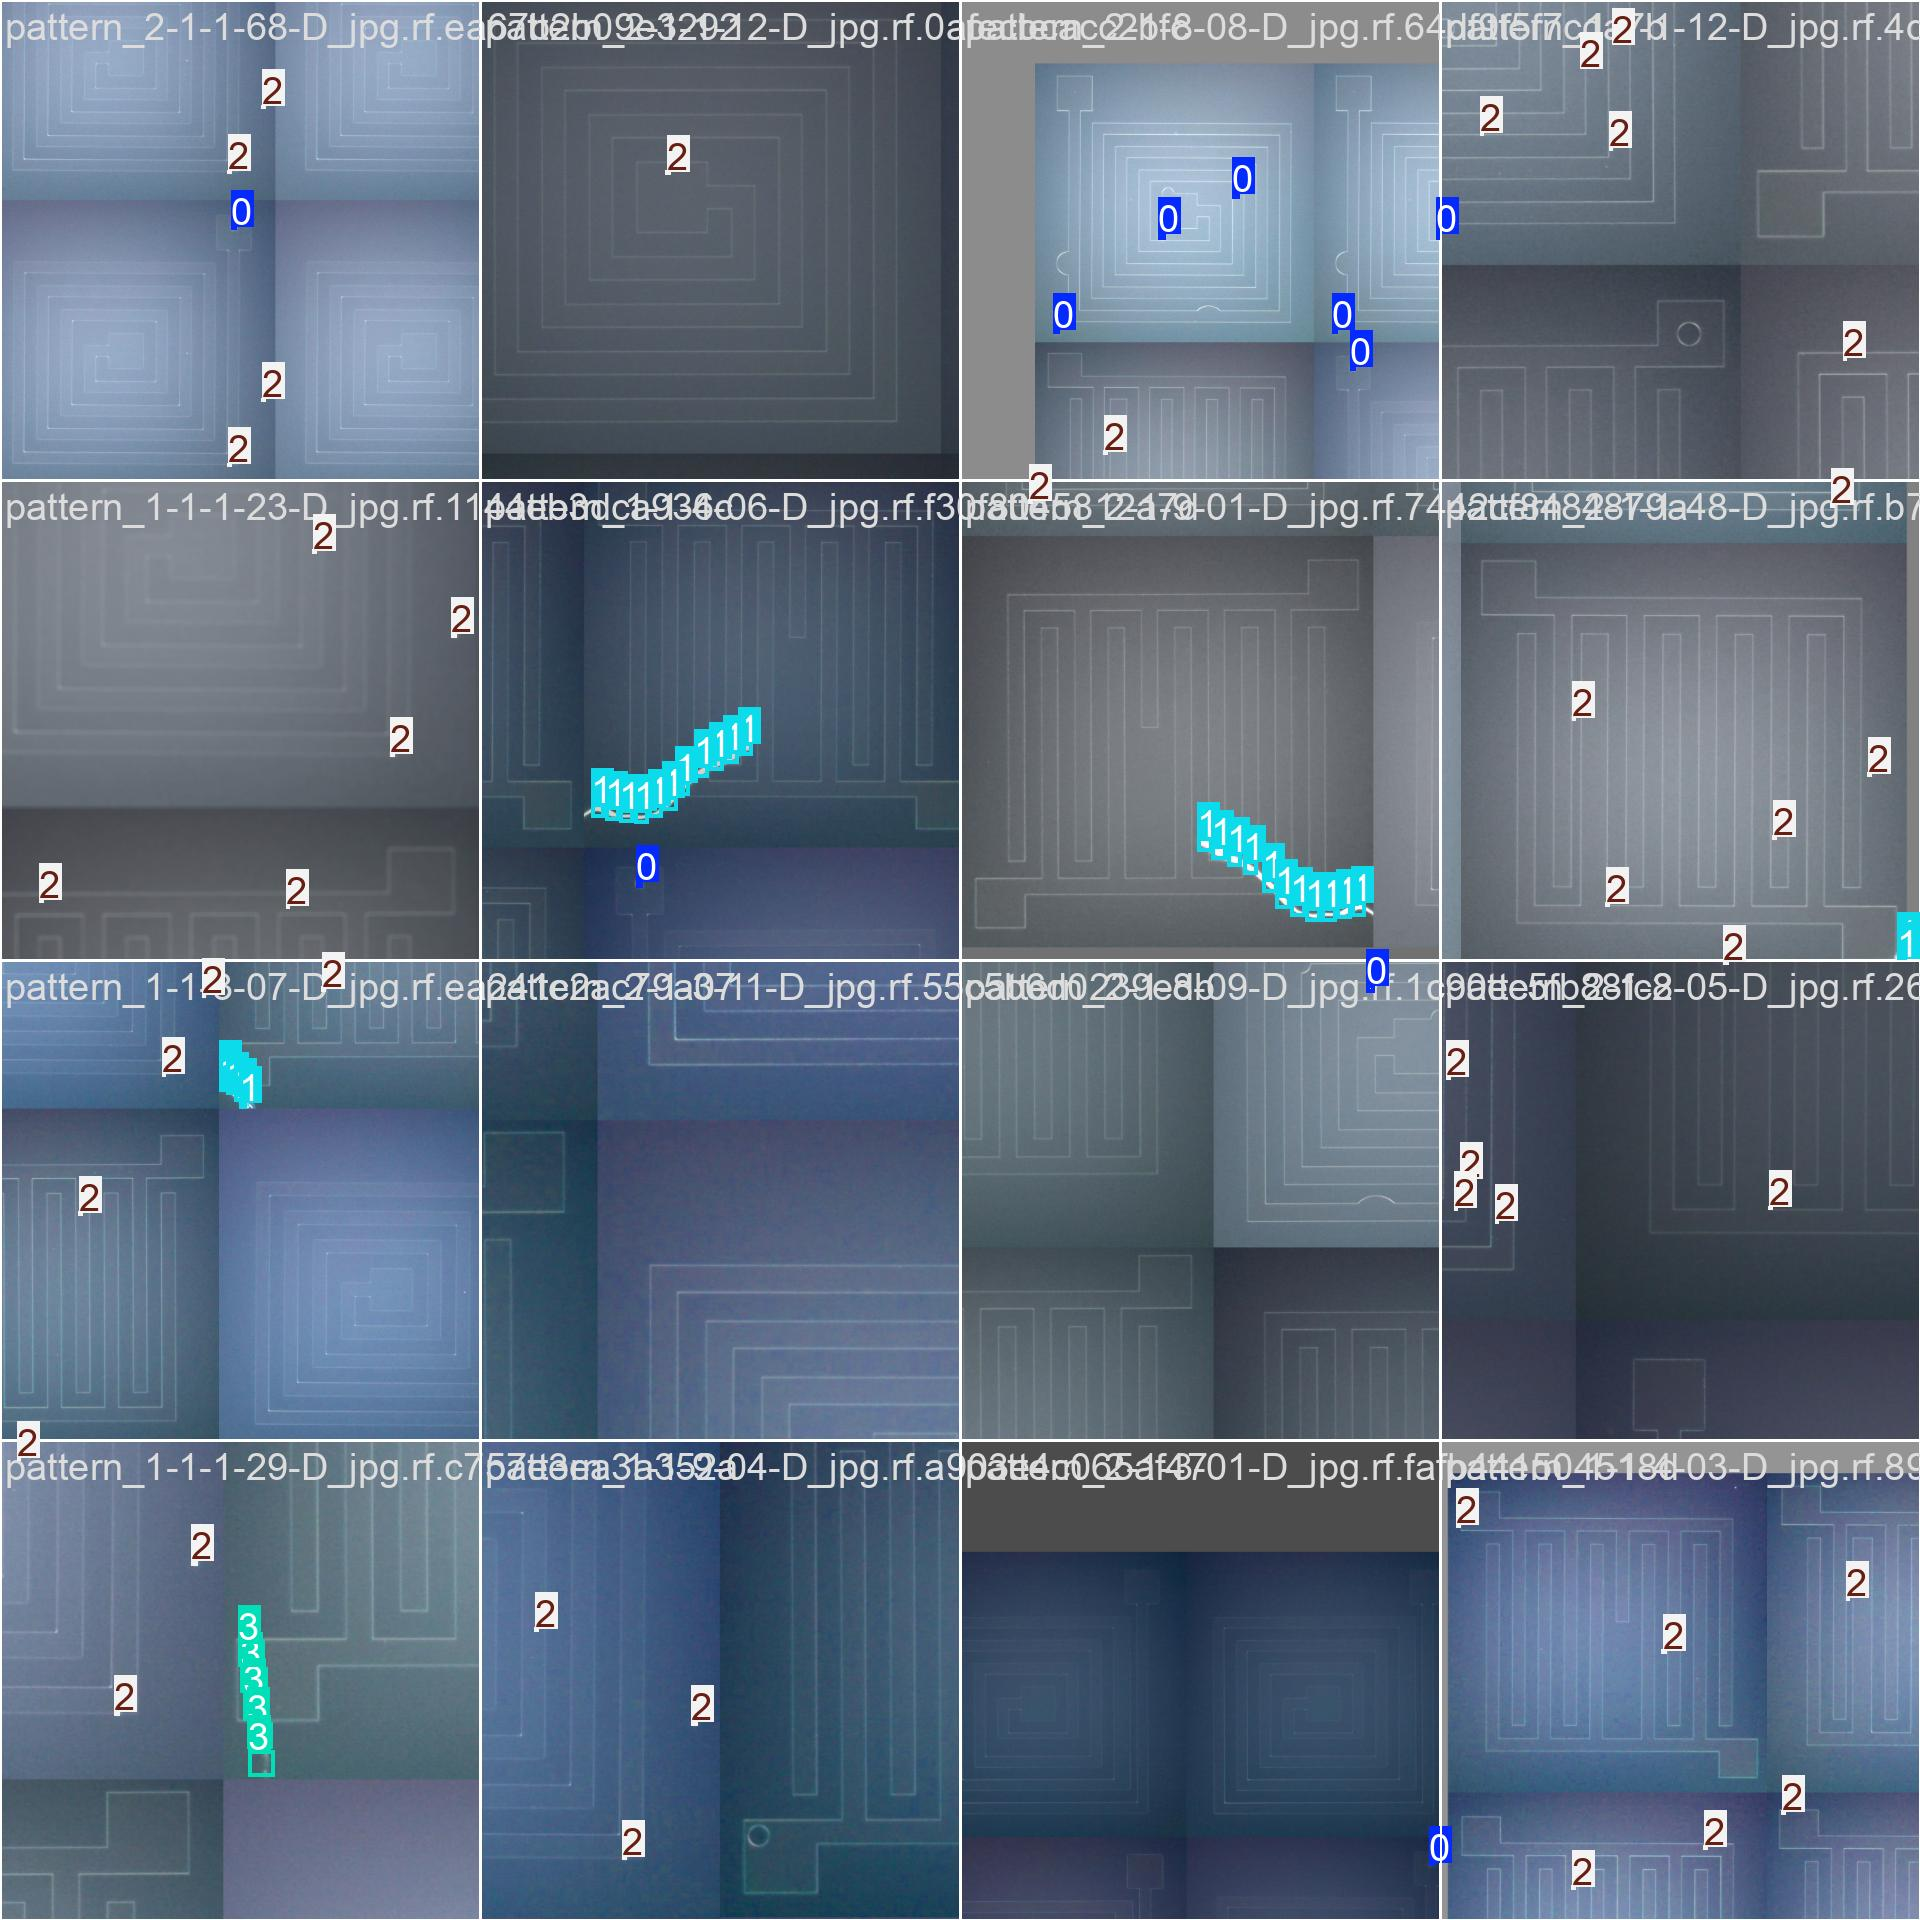

In [ ]:
from PIL import Image
from IPython.display import Image, clear_output

Image(filename='/content/runs/detect/train/train_batch0.jpg', width=1000)

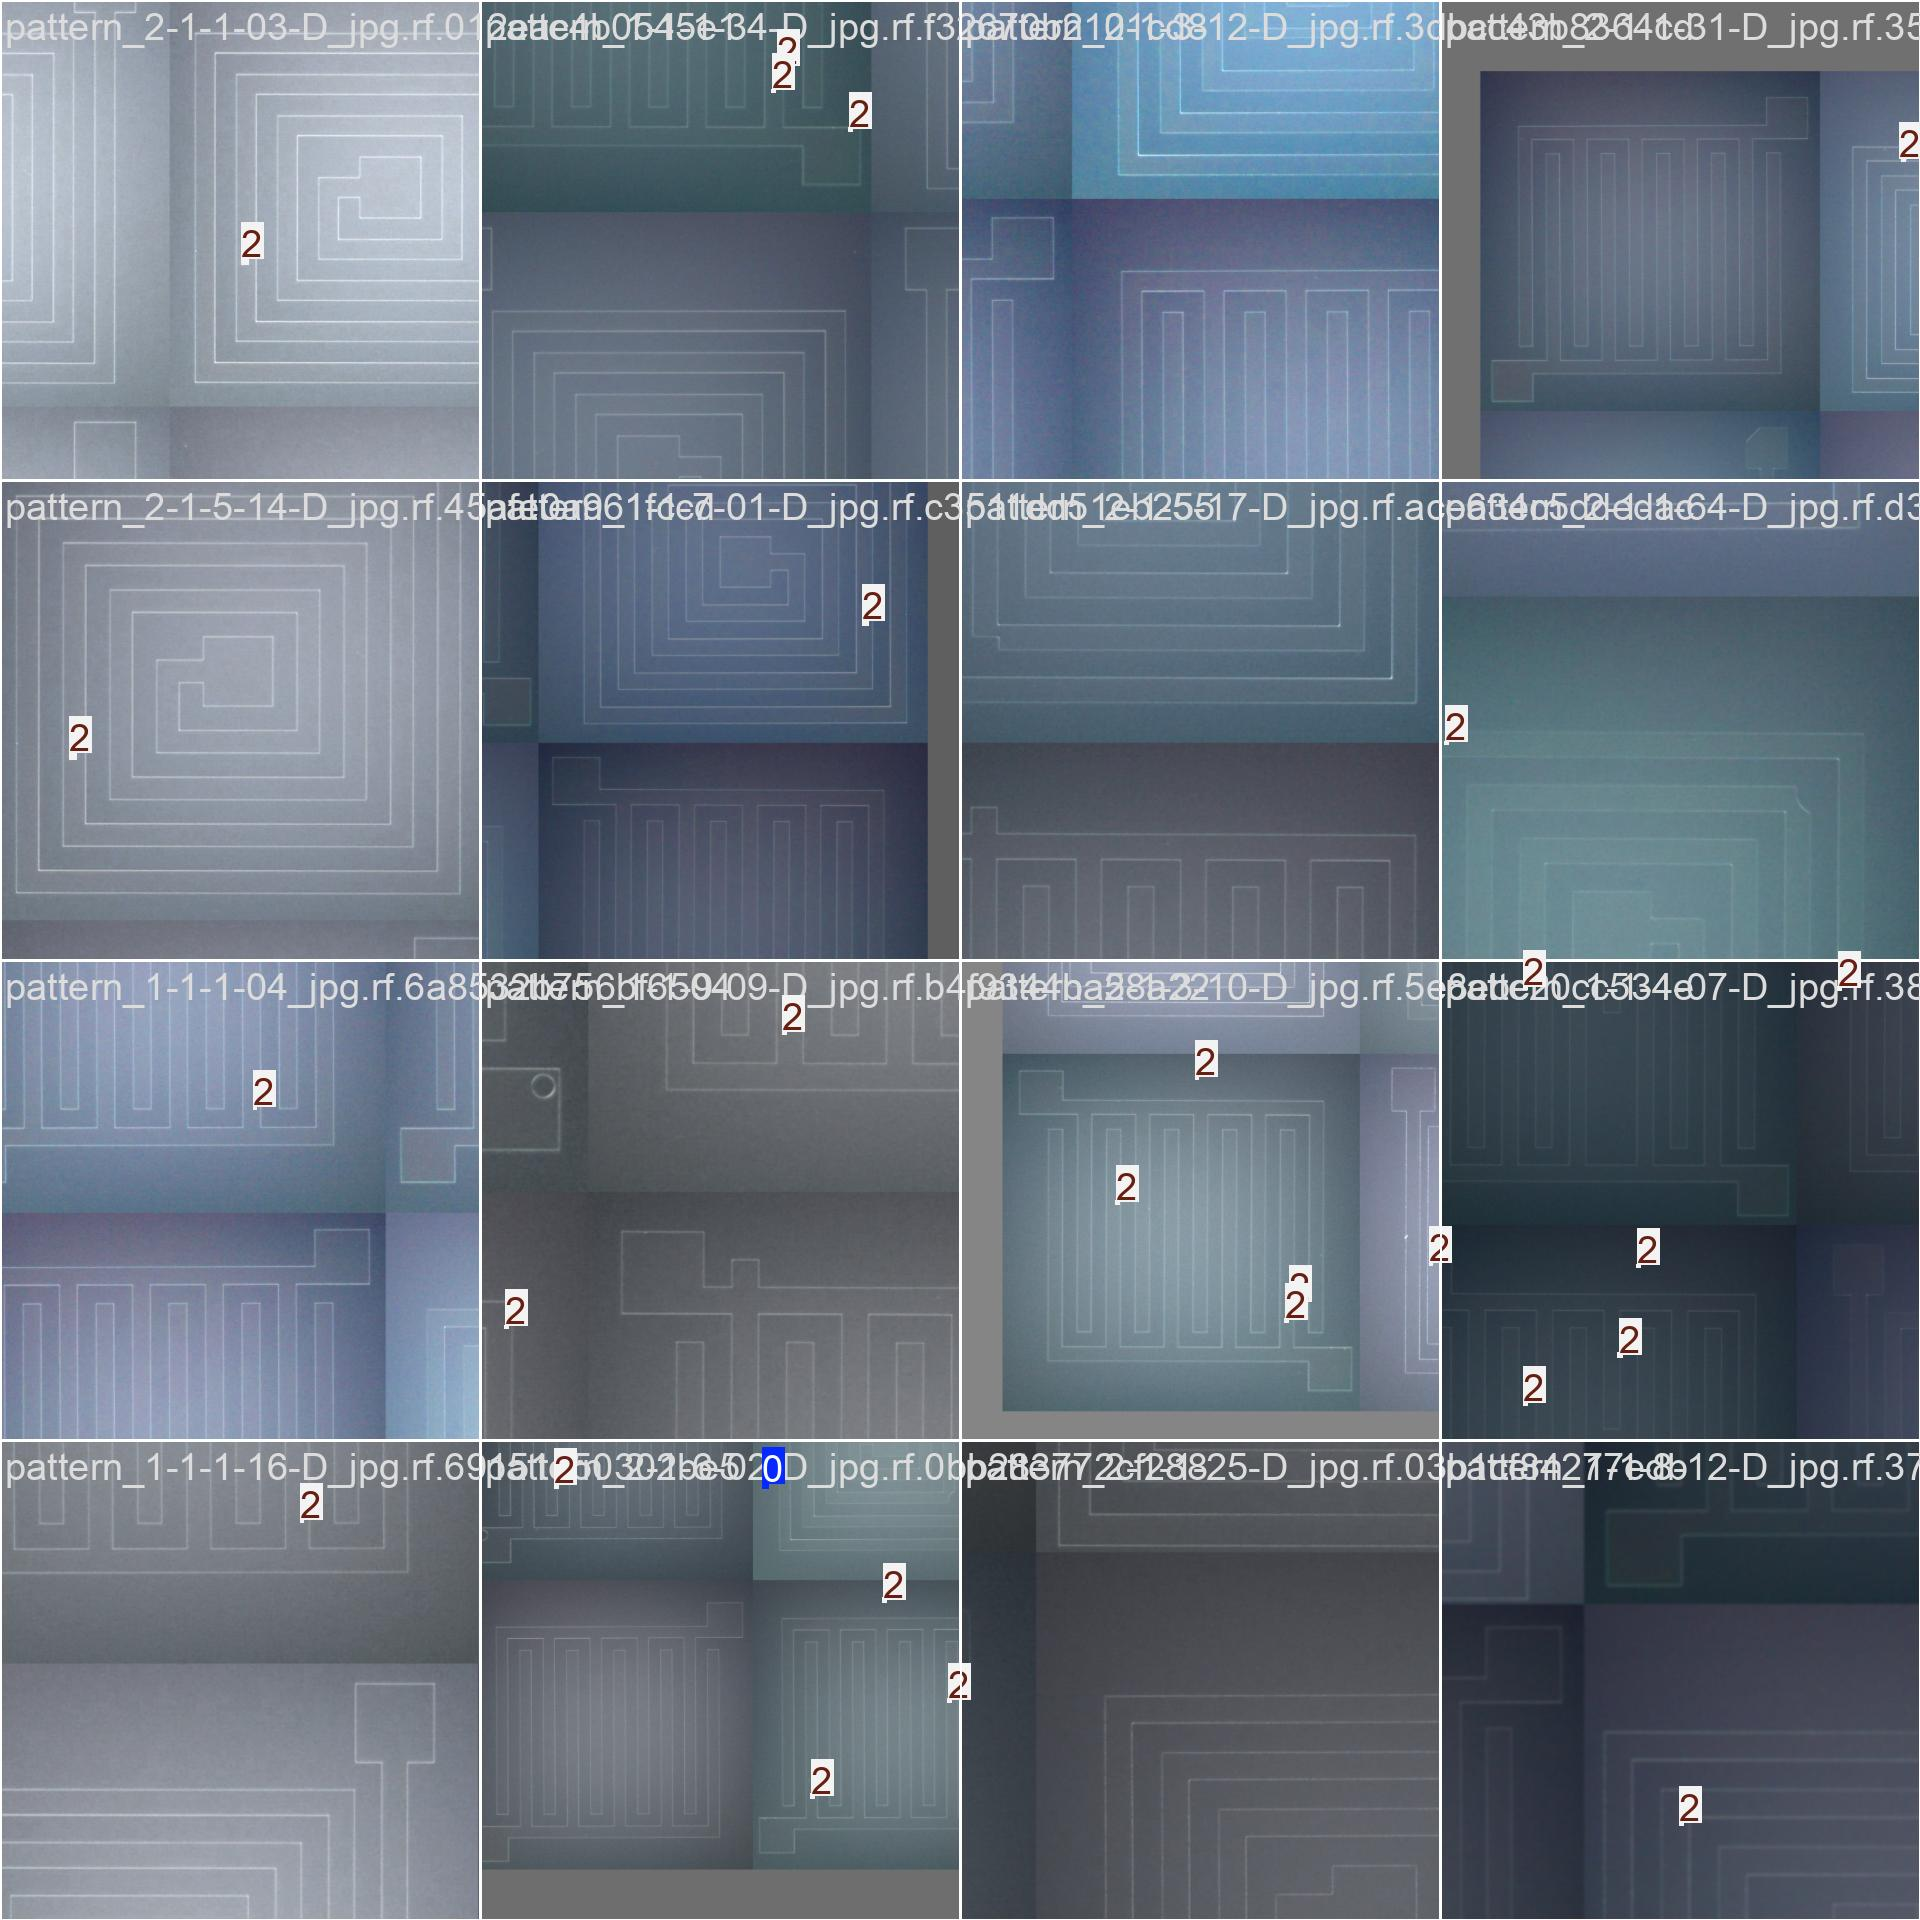

In [ ]:
from PIL import Image
from IPython.display import Image, clear_output

Image(filename='/content/runs/detect/train/train_batch1.jpg', width=1000)

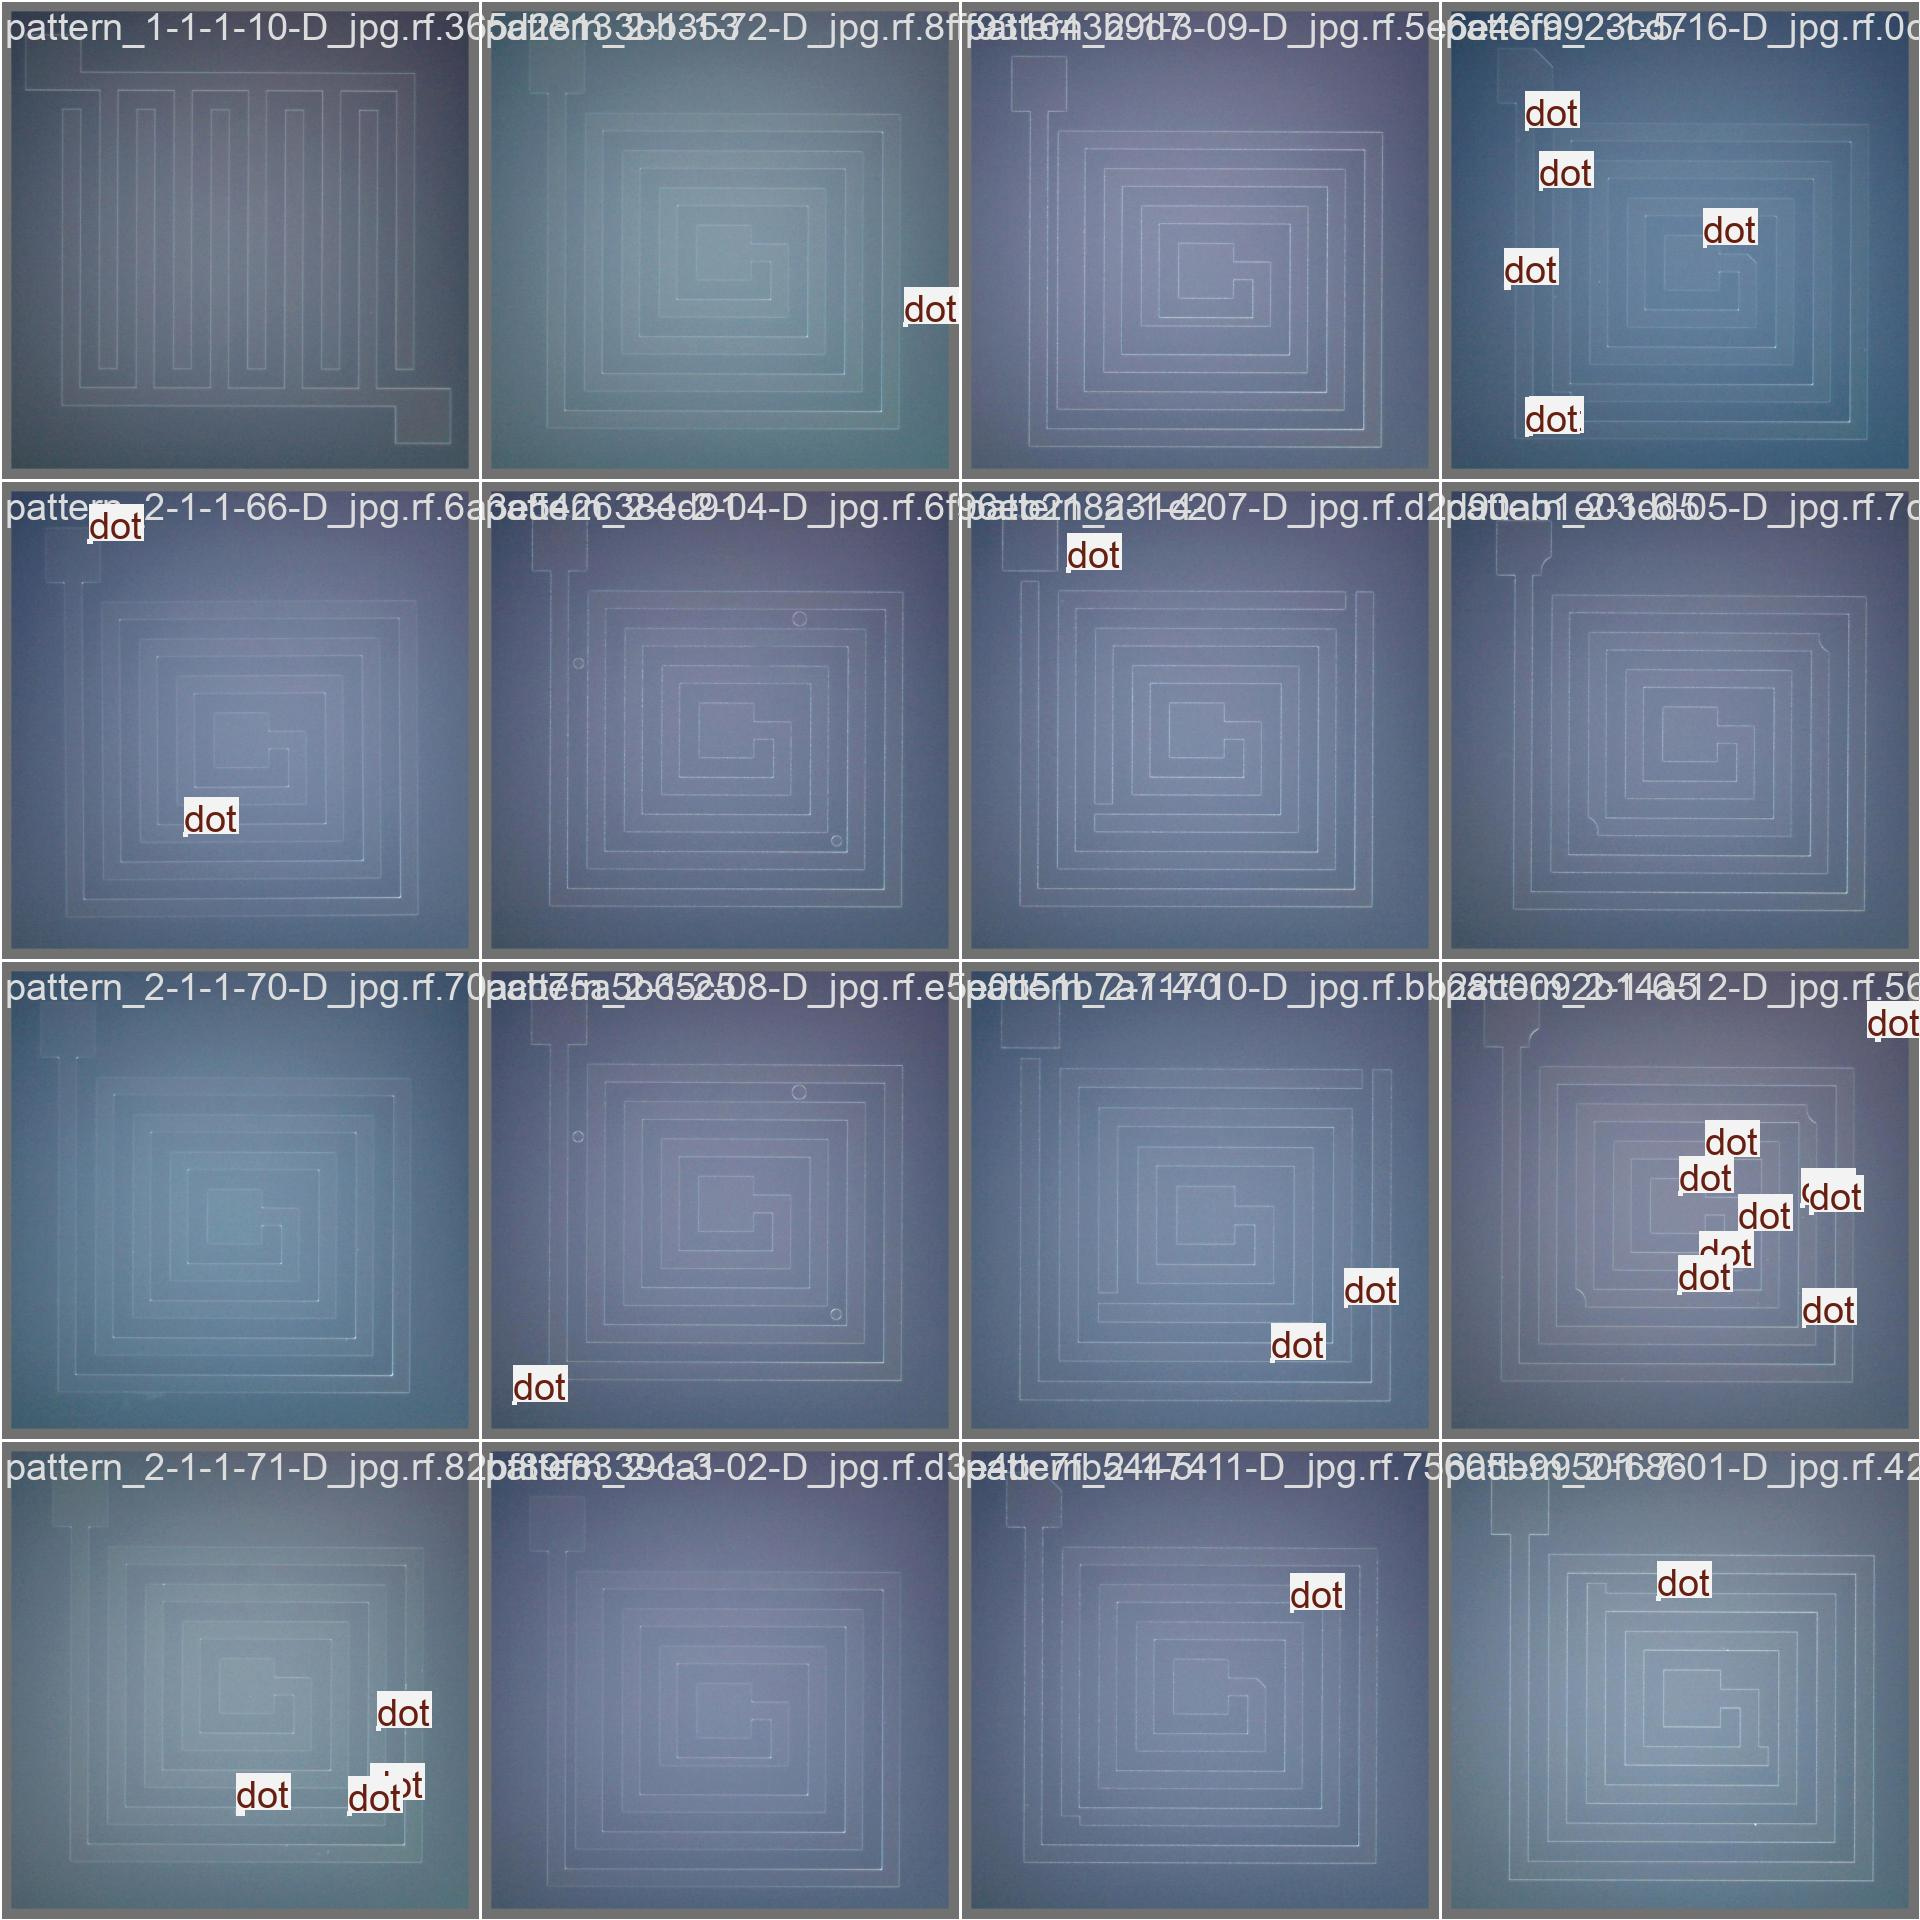

In [ ]:
from PIL import Image
from IPython.display import Image, clear_output

Image(filename='/content/runs/detect/train/val_batch0_labels.jpg', width=1000)

In [ ]:
results = model.predict(source='/content/drive/MyDrive/kdt_240424/m8_vision응용/semiconductor/data/valid/images', save=True)


image 1/41 /content/drive/MyDrive/kdt_240424/m8_vision응용/semiconductor/data/valid/images/pattern_1-1-1-10-D_jpg.rf.365d28133bb353574b836a4d5d48280b.jpg: 640x640 (no detections), 8.7ms
image 2/41 /content/drive/MyDrive/kdt_240424/m8_vision응용/semiconductor/data/valid/images/pattern_1-1-1-20-D_jpg.rf.7c908a8097ae8cfbb51f580a2c85fb0d.jpg: 640x640 (no detections), 8.8ms
image 3/41 /content/drive/MyDrive/kdt_240424/m8_vision응용/semiconductor/data/valid/images/pattern_1-1-1-36-D_jpg.rf.97e7c47b7bea7e3fc3fc38b3c81d7de4.jpg: 640x640 (no detections), 8.4ms
image 4/41 /content/drive/MyDrive/kdt_240424/m8_vision응용/semiconductor/data/valid/images/pattern_1-1-1-38-D_jpg.rf.64a7c680aab4702d7fc770fabfd4b018.jpg: 640x640 (no detections), 8.5ms
image 5/41 /content/drive/MyDrive/kdt_240424/m8_vision응용/semiconductor/data/valid/images/pattern_1-1-2-01-D_jpg.rf.0a8a7fc81d9446c43c343039a67e0fb5.jpg: 640x640 (no detections), 8.4ms
image 6/41 /content/drive/MyDrive/kdt_240424/m8_vision응요

In [ ]:
print(type(results), len(results))

<class 'list'> 41


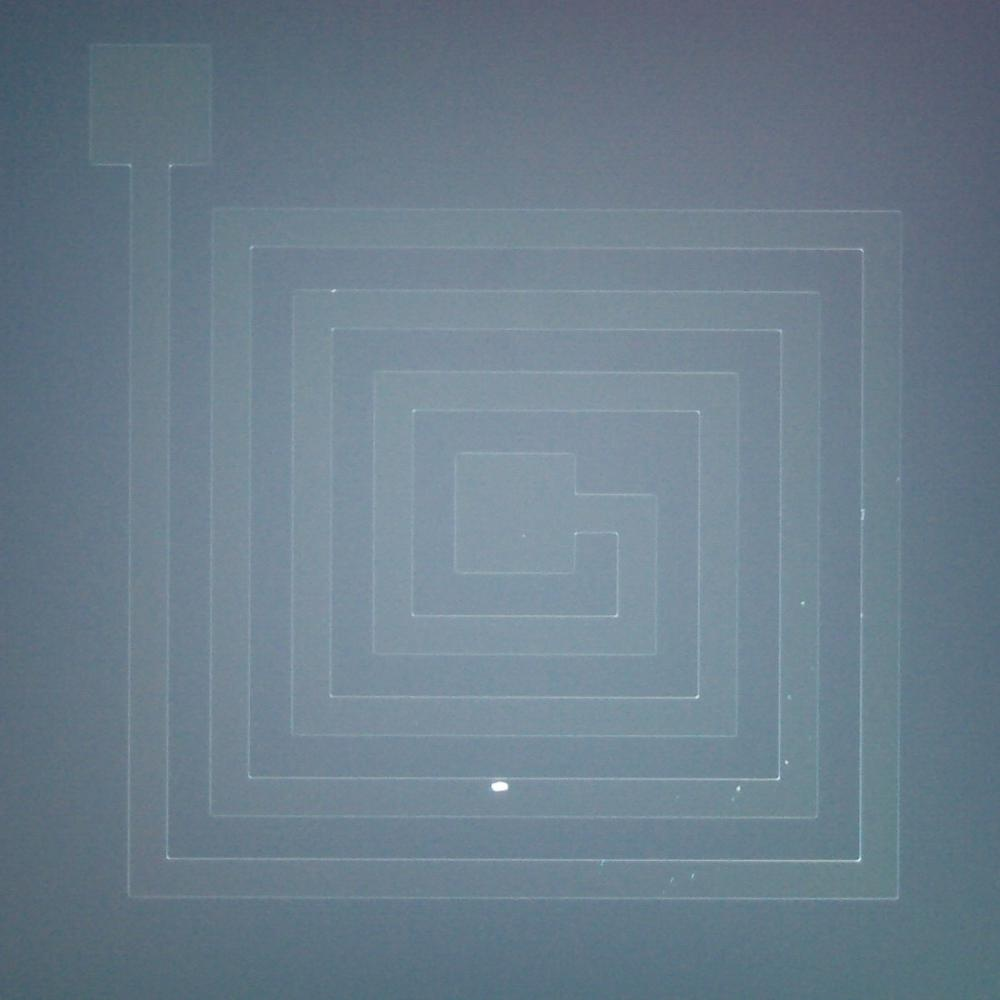

In [ ]:
import glob
import random
from IPython.display import Image,display

Image_name = random.choice(glob.glob('/content/runs/detect/train2/*.jpg'))
display(Image(filename=Image_name, width=600, height=600))